In [233]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel(r'C:\Users\Giulia\Desktop\DTU\1\Intro2ml&dm\project1\diabetes_dataset.xlsx')
#print(df)

df = pd.DataFrame(df)
df.tail()

#delete outliers
df= df[df['SkinThickness'] != 0]
df= df[df['Insulin'] != 0]
df= df[df['Pregnancies']/df['Age'] < 0.5]
df= df[df['BloodPressure'] >20]
df= df[df['BloodPressure']<180]
df= df[df['Glucose'] >50]
df= df[df['Glucose']<160]
df= df[df['BMI']>15]
df= df[df['BMI']<50]

df.describe()
#df.median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,3.242515,113.619760,70.005988,28.476048,138.008982,32.347006,0.503677,29.949102,0.245509
std,3.172402,22.605954,12.012005,10.363558,95.819321,6.406981,0.313765,9.566919,0.431034
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,96.250000,62.000000,20.000000,73.250000,27.725000,0.264000,23.000000,0.000000
50%,2.000000,112.000000,70.000000,28.000000,115.000000,32.600000,0.439000,26.000000,0.000000
75%,5.000000,129.000000,78.000000,35.750000,176.000000,36.600000,0.676250,34.000000,0.000000
max,15.000000,158.000000,106.000000,60.000000,600.000000,49.700000,2.288000,81.000000,1.000000


In [205]:
print(df.shape)
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

(334, 9)


In [206]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

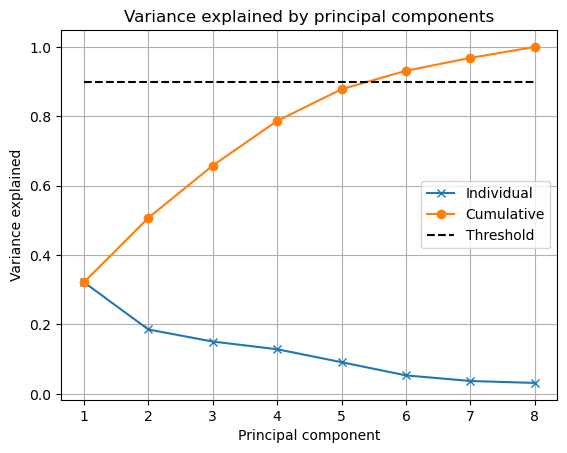

In [239]:
pca = PCA(n_components=8)
X2D = pca.fit_transform(X)
rho=pca.explained_variance_ratio_
cumsum = np.cumsum(rho)
component = np.arange(1,cumsum.shape[0]+1,1)
threshold=0.9
plt.figure()
plt.plot(component,rho,'x-')
plt.plot(component,cumsum,'o-')
plt.plot([1,len(component)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

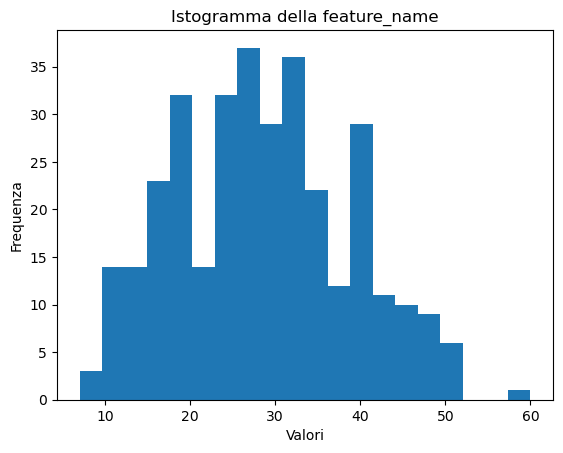

In [207]:
# Traccia l'istogramma per una variabile (ad esempio, 'feature_name')
plt.hist(df['SkinThickness'], bins=20)  # Puoi regolare il numero di bin
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Istogramma della feature_name')
plt.show()

In [208]:
from scipy.stats import shapiro

stat, p = shapiro(df['SkinThickness'])
print('Statistiche del test:', stat)
print('Valore p:', p)

# Interpretazione dei risultati
alpha = 0.02
if p > alpha:
    print("I dati sembrano essere distribuiti normalmente.")
else:
    print("I dati non seguono una distribuzione normale.")


Statistiche del test: 0.9862401485443115
Valore p: 0.0028673072811216116
I dati non seguono una distribuzione normale.


In [209]:
print('Pregnancies: no\n', 'Glucose: no\n', 'BloodPressure: si\n', 'SkinThickness: no\n', 'Insulin: no\n',
       'BMI: si\n', 'DiabetesPedigreeFunction: no\n', 'Age: no\n' )

Pregnancies: no
 Glucose: no
 BloodPressure: si
 SkinThickness: no
 Insulin: no
 BMI: si
 DiabetesPedigreeFunction: no
 Age: no



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


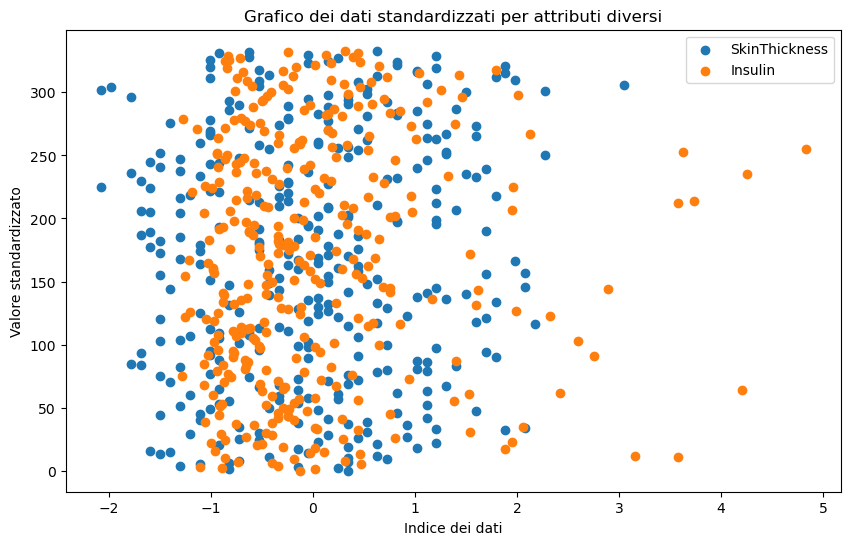

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Standardizza tutti i dati nel dataframe
scaler = StandardScaler()
df_standardizzato = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Crea un grafico a dispersione con colori diversi per gli attributi standardizzati
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico

print(df_standardizzato.columns)
#plt.scatter(df_standardizzato.index, df_standardizzato['Pregnancies'], label='Pregnancies')
#plt.scatter(df_standardizzato.index, df_standardizzato['Glucose'], label='Glucose')
#plt.scatter(df_standardizzato['BloodPressure'],df_standardizzato.index, label='BloodPressure')
plt.scatter(df_standardizzato['SkinThickness'], df_standardizzato.index,  label='SkinThickness')
plt.scatter(df_standardizzato['Insulin'], df_standardizzato.index, label='Insulin')


# Personalizza il grafico
plt.xlabel('Indice dei dati')
plt.ylabel('Valore standardizzato')
plt.title('Grafico dei dati standardizzati per attributi diversi')
plt.legend()  # Mostra la legenda con i nomi degli attributi

# Mostra il grafico
plt.show()


# CORRELATION

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [234]:
df = df.iloc[:, :-1]

In [235]:
correlation_matrix = df.corr()

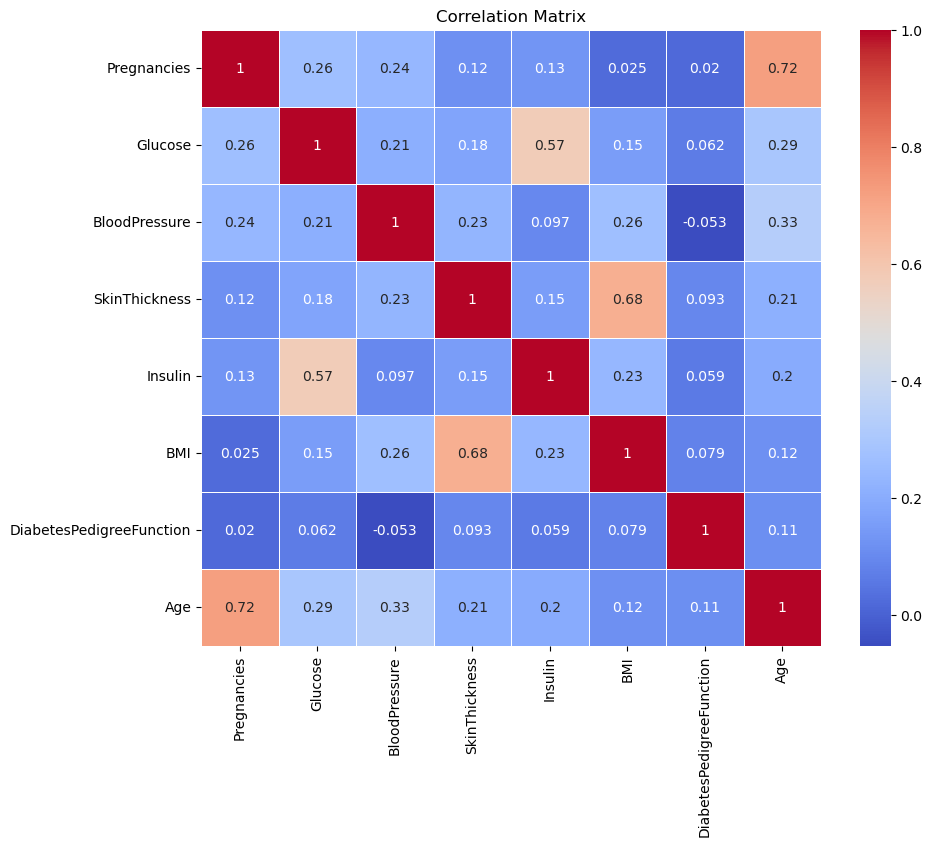

In [236]:
plt.figure(figsize=(10, 8))  # Imposta le dimensioni della figura
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

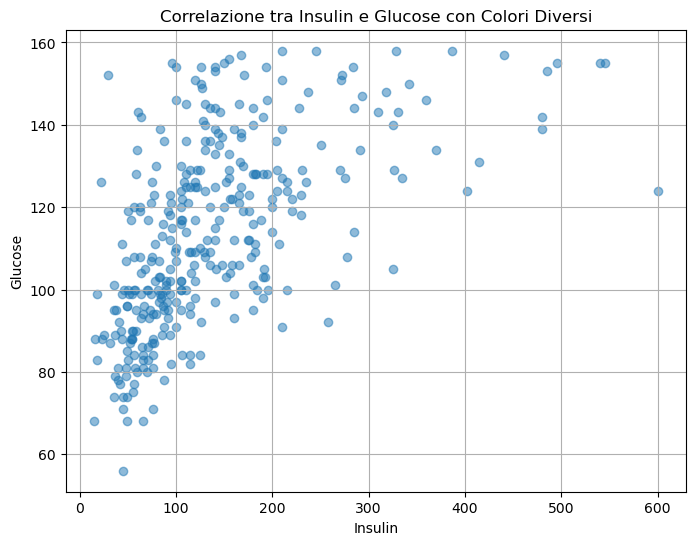

In [226]:
# Seleziona gli attributi "Insulin" e "Glucose"

insulin = df['Insulin']
glucose = df['Glucose']

#target = df['Outcome']  # Supponi che 'target' abbia valori 0 o 1

# Definisci i colori per le due categorie (ad esempio, rosso e blu)
#colors = ['red' if t == 0 else 'blue' for t in target]

# Crea un grafico a dispersione con colori diversi per le due categorie
plt.figure(figsize=(8, 6))
plt.scatter(insulin, glucose, alpha=0.5) #c=colors)  # Usa il parametro 'c' per i colori
plt.title('Correlazione tra Insulin e Glucose con Colori Diversi')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.grid(True)

# Mostra il grafico
plt.show()


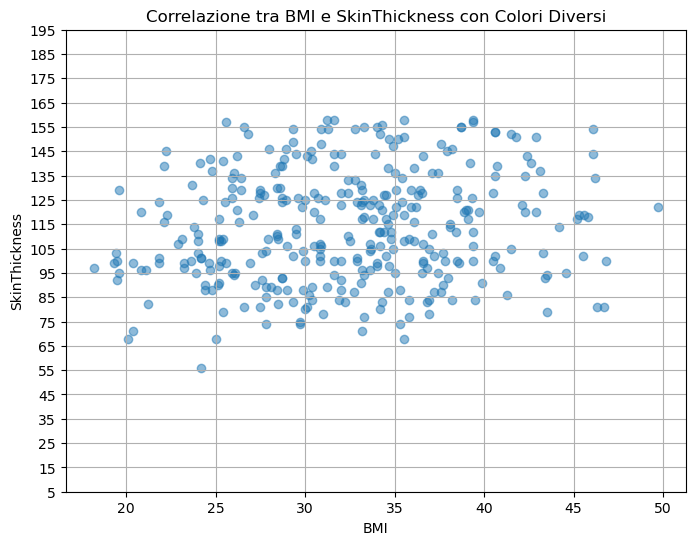

In [231]:
# Seleziona gli attributi "Insulin" e "Glucose"
BMI = df['BMI']
SkinThickness = df['SkinThickness']

#target = df['Outcome']  # Supponi che 'target' abbia valori 0 o 1

# Definisci i colori per le due categorie (ad esempio, rosso e blu)
#colors = ['red' if t == 0 else 'blue' for t in target]

# Crea un grafico a dispersione con colori diversi per le due categorie
plt.figure(figsize=(8, 6))
plt.scatter(BMI, glucose, alpha=0.5) #c=colors)  # Usa il parametro 'c' per i colori
plt.title('Correlazione tra BMI e SkinThickness con Colori Diversi')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.grid(True)

# Mostra il grafico
plt.show()